# Artificial Neural Network

### Importing the libraries

In [241]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [242]:
tf.__version__

'2.17.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [243]:
dataset = pd.read_csv('/kaggle/input/churn-dataset/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values # write down here why we are using 3:-1 why these columns
y = dataset.iloc[:, -1].values

#### We use 3:-1 as other the columns 0 ,1 and 2 are irrelevant attributes

In [244]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [245]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [246]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2]=le.fit_transform(X[:,2])

In [247]:
print(X[:,2])

[0 0 0 ... 0 1 0]


One Hot Encoding the "Geography" column

In [248]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) 

In [249]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
X_train = np.array(X_train, dtype=np.float32)  # Ensure float32 type
y_train = np.array(y_train, dtype=np.float32)

### Feature Scaling

In [252]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [253]:
X_train.shape

(8000, 12)

## Part 2 - Building the ANN

### Initializing the ANN

In [254]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [255]:
ann.add(tf.keras.Input(shape=(12,)))
ann.add(tf.keras.layers.Dense(64,activation='relu'))

### Adding the second hidden layer

In [256]:
ann.add(tf.keras.layers.Dense(32,activation='relu'))

### Adding the output layer

In [257]:
ann.add(tf.keras.layers.Dense(1,activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [258]:
from tensorflow.keras.optimizers import Adam

ann.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

### Training the ANN on the Training set

In [259]:
ann.fit(x=X_train,y=y_train,batch_size=10,epochs=30,shuffle=True)

Epoch 1/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7901 - loss: 0.4713
Epoch 2/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8559 - loss: 0.3519
Epoch 3/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8640 - loss: 0.3429
Epoch 4/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8655 - loss: 0.3306
Epoch 5/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8604 - loss: 0.3345
Epoch 6/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8568 - loss: 0.3329
Epoch 7/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8671 - loss: 0.3231
Epoch 8/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8651 - loss: 0.3281
Epoch 9/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8652 - loss: 0.3226
Epoch 10/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8704 - loss: 0.3149
Epoch 11/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8694 - loss: 0.3094
Epoch 12/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Extra**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [260]:
test_case=[[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]
test_case=sc.transform(test_case)
prediction=ann.predict(test_case)
predicted_class = (prediction[0][0] > 0.5).astype(int)

print(f"Predicted Probability: {prediction[0][0]:.4f}")
print(f"Predicted Class: {predicted_class} (1 = Churn, 0 = No Churn)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted Probability: 0.0321
Predicted Class: 0 (1 = Churn, 0 = No Churn)


### Predicting the Test set results

In [271]:
predictions=ann.predict(X_test)
predictions

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.09576244],
       [0.01654707],
       [0.03757238],
       ...,
       [0.67596966],
       [0.15393916],
       [0.6507643 ]], dtype=float32)

### Making the Confusion Matrix

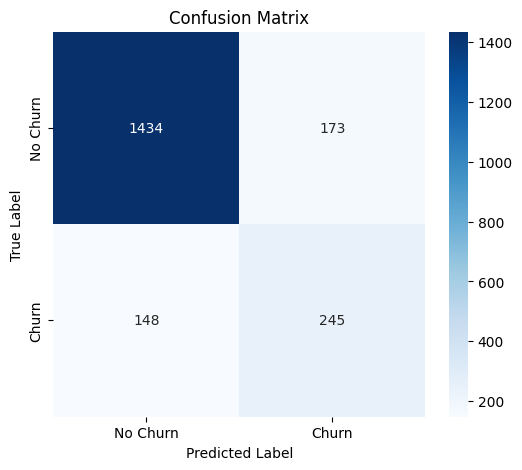

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = (predictions > 0.4).astype(int)  # Convert to binary labels

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


write down about precision recall f1-score, why is it better than just accuracy, what are some other interesting metrics u can find

In [270]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 6356, 1.0: 1644}


### since the data contains more no churn than churns, the model appears to be biased.